<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Laboratorios/Laboratorio%202/Sesion 1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

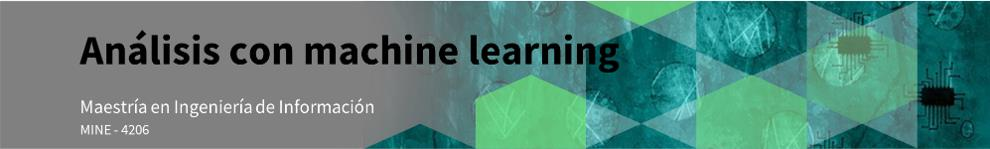

**Tutores**.
* Nicolás Tibatá Casteñeda.
* Fabián Camilo Castellanos P.

#Tabla de contenido

[Contexto y objetivos.](scrollTo=opGTmPf8s2Fw)<br>
[Entendimiento del negocio.](#scrollTo=DOkcUScIu2VX)<br>
[0. Instalación de librerías.](#scrollTo=j-M4bk-eBFw-)<br>
[1. Importar librerías](#scrollTo=s90KOHNvxPWi)<br>
[2. Introducción a los datos.](#scrollTo=LMUySTJvvJq1)<br>
[3. Modelamiento.](#scrollTo=kdDLH6BKv839)<br>
[4. Preguntas.](#scrollTo=mVxgC4xqyND9)<br>

---
# Contexto y objetivos.

La empresa educativa X Education vende cursos en línea a profesionales del sector y promociona sus cursos en varios sitios web y motores de búsqueda. Una vez que los visitantes llegan al sitio web, tienen la opción de explorar los cursos, completar un formulario de contacto o ver vídeos informativos. Aquellos que completan el formulario proporcionando su dirección de correo electrónico o número de teléfono se consideran clientes potenciales. Además, la empresa también obtiene clientes potenciales a través de referencias anteriores. Luego, el equipo de ventas de X Education se encarga de contactar a estos clientes potenciales mediante llamadas telefónicas, correos electrónicos, etc.

Aunque la empresa recibe una cantidad considerable de clientes potenciales, su tasa de conversión es baja, aproximadamente del 30%. Para mejorar la eficacia de este proceso, X Education busca identificar los clientes potenciales con mayor potencial, también conocidos como "clientes de calidad". Al enfocarse en este grupo selecto de clientes potenciales, la empresa espera aumentar su tasa de conversión, ya que el equipo de ventas podrá dirigir sus esfuerzos de comunicación de manera más efectiva en lugar de realizar llamadas indiscriminadas a todos los clientes potenciales.

**Objetivos:**
- Construir un modelo de clasificación con Regresión Logística
- Determinar las métricas de los modelos de clasificación
- Realizar busqueda de hiperparámetros basado en métricas y gráficas

La fuente de los datos la puedes encontrar en [Lead Scoring](https://www.kaggle.com/datasets/amritachatterjee09/lead-scoring-dataset).



# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

|Variables | Description|
|---|:|
| Prospect ID | A unique ID with which the customer is identified.|
|Lead Number | A lead number assigned to each lead procured.
|Lead Origin | The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
Lead Source | The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
Do Not Email | An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
Do Not Call | An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
Converted |The target variable. Indicates whether a lead has been successfully converted or not.
TotalVisits | The total number of visits made by the customer on the website.
Total Time Spent on Website | The total time spent by the customer on the website.
Page Views Per Visit | Average number of pages on the website viewed during the visits.
Last Activity |Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
Country | The country of the customer.
Specialization | The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
How did you hear about X Education | The source from which the customer heard about X Education.
What is your current occupation | Indicates whether the customer is a student, umemployed or employed.
What matters most to you in choosing this course | An option selected by the customer indicating what is their main motto behind doing this course.
Search | Indicating whether the customer had seen the ad in any of the listed items.
Magazine | Indicating whether the customer had seen the ad in any of the listed items.
Newspaper Article | Indicating whether the customer had seen the ad in any of the listed items.
X Education Forums |Indicating whether the customer had seen the ad in any of the listed items.
Newspaper | Indicating whether the customer had seen the ad in any of the listed items.
Digital Advertisement |Indicating whether the customer had seen the ad in any of the listed items.
Through Recommendations | Indicates whether the customer came in through recommendations.
Receive More Updates About Our Courses | Indicates whether the customer chose to receive more updates about the courses.
Lead Profile | A lead level assigned to each customer based on their profile.
City | The city of the customer.
Asymmetrique Activity Score | Score assigned to each customer based on their activity and their profile.
Asymmetrique Profile Score | Score assigned to each customer based on their activity and their profile.
I agree to pay the amount through cheque | Indicates whether the customer has agreed to pay the amount through cheque or not.
a free copy of Mastering The Interview | Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
Last Notable Activity | The last notable acitivity performed by the student.



---
# 0. Instalación de librerías.

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 880.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 903.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 2.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=daf93c8ade256dfe641cbc4a8a1b468f097a1954a79119086b1d013e1e3cee48
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


---
# 1. Importar librerías

In [ ]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, roc_auc_score

#Librerías extras
import itertools

---
# 2. Introducción a los datos.

### 2.1. Parámetros generales y carga de la información.

In [ ]:
#Porcentaje para validación y test
test_val_alpha = 0.2
#random_state o semilla para la reproducibilidad
my_seed = 19

In [ ]:
url = 'https://raw.githubusercontent.com/fcastellanosp/MINE-4206_202410_AML/main/Laboratorios/Laboratorio%202/lead_scoring.csv'
data = pd.read_csv(url)

Verificamos si la información fue cargada correctamente en el pandas dataframe:

In [ ]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses    Lead Profile    City  \
0                                     No          Select  Select   
1                                     No          Select  Select   
2                                     No  Potential Lead  Mumbai   
3                                     No          Select  Mumbai   
4                                     No          Select  Mumbai   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 31 columns]

### 2.2. Separación de la información.

### 2.2.1. Entrenamiento y test.

Separamos los datos de entrenamiento y test (20%), junto con el parámetro de reproducibilidad o semilla (`random_state`):

In [ ]:
train, test = train_test_split(data, test_size=test_val_alpha, random_state=my_seed)
train.head()

Prospect ID  Lead Number  \
2118  15ef3886-f3e6-4a57-9449-20f468068a26       639321   
4504  6f8d7371-95ce-474d-a2c2-17c34a6bdba7       616521   
1700  0a9b1a0a-265f-49a7-9099-8890f7e5df85       642856   
7053  084f5caa-eca5-4384-ac96-70eae48313fc       595576   
141   a56dc332-499f-4145-ae65-79d9ca8a5fd9       659117   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
2118            Lead Add Form       Reference           No          No   
4504  Landing Page Submission          Google           No          No   
1700  Landing Page Submission          Google           No          No   
7053                      API          Google           No          No   
141                       API  Referral Sites           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
2118          1          0.0                            0   
4504          1          5.0                         1063   
1700          1          4.0                         1590   
7053          1          4.0                         1483   
141           0          6.0                          216   

      Page Views Per Visit  ... Digital Advertisement Through Recommendations  \
2118                   0.0  ...                    No                      No   
4504                   2.5  ...                    No                      No   
1700                   4.0  ...                    No                      No   
7053                   2.0  ...                    No                      No   
141                    2.0  ...                    No                      No   

     Receive More Updates About Our Courses    Lead Profile  \
2118                                     No  Potential Lead   
4504                                     No  Potential Lead   
1700                                     No          Select   
7053                                     No  Potential Lead   
141                                      No             NaN   

                   City Asymmetrique Activity Score  \
2118             Select                        15.0   
4504  Thane & Outskirts                         NaN   
1700             Mumbai                        15.0   
7053       Other Cities                         NaN   
141                 NaN                        14.0   

     Asymmetrique Profile Score I agree to pay the amount through cheque  \
2118                       19.0                                       No   
4504                        NaN                                       No   
1700                       18.0                                       No   
7053                        NaN                                       No   
141                        13.0                                       No   

     A free copy of Mastering The Interview     Last Notable Activity  
2118                                     No                  Modified  
4504                                     No              Email Opened  
1700                                     No              Email Opened  
7053                                     No  Had a Phone Conversation  
141                                      No   Page Visited on Website  

[5 rows x 31 columns]

### 2.2.2. Validación.

In [ ]:
new_train, val = train_test_split(train, test_size=test_val_alpha, random_state=my_seed)
new_train.head()

Prospect ID  Lead Number  \
4503  2344e655-0f38-4f0d-a4fb-c054e985c562       616531   
6103  508fb9a1-ee53-4dd1-b179-b4bbe269648c       602953   
7242  dc53e754-bc0e-42d6-a444-448dae6a0d24       593909   
5723  408173b5-4b49-4244-b4e7-6985ecb78726       606035   
4662  a091e50b-361a-4603-a4e7-2fd54a9ee614       614998   

                  Lead Origin       Lead Source Do Not Email Do Not Call  \
4503                      API        Olark Chat           No          No   
6103                      API    Organic Search           No          No   
7242                      API        Olark Chat           No          No   
5723  Landing Page Submission    Organic Search           No          No   
4662            Lead Add Form  Welingak Website           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
4503          0          0.0                            0   
6103          0          7.0                          303   
7242          0          1.0                          192   
5723          1         21.0                         1587   
4662          1          1.0                          846   

      Page Views Per Visit  ... Digital Advertisement Through Recommendations  \
4503                   0.0  ...                    No                      No   
6103                   3.5  ...                    No                      No   
7242                   1.0  ...                    No                      No   
5723                   3.5  ...                    No                      No   
4662                   1.0  ...                    No                      No   

     Receive More Updates About Our Courses Lead Profile    City  \
4503                                     No          NaN     NaN   
6103                                     No          NaN     NaN   
7242                                     No          NaN     NaN   
5723                                     No       Select  Mumbai   
4662                                     No       Select  Select   

     Asymmetrique Activity Score Asymmetrique Profile Score  \
4503                         NaN                        NaN   
6103                         NaN                        NaN   
7242                        17.0                       15.0   
5723                         NaN                        NaN   
4662                         NaN                        NaN   

     I agree to pay the amount through cheque  \
4503                                       No   
6103                                       No   
7242                                       No   
5723                                       No   
4662                                       No   

     A free copy of Mastering The Interview    Last Notable Activity  
4503                                     No                 SMS Sent  
6103                                     No             Email Opened  
7242                                     No  Olark Chat Conversation  
5723                                    Yes                 SMS Sent  
4662                                     No                 Modified  

[5 rows x 31 columns]

## 2.3. Exploración de los datos.

In [ ]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.4. Insights obtenidos de la información.

**Del anterior proceso podemos concluir:**

* Las variables *Prospect ID* y *Lead Number* son identificadores que no necesitamos para el procesamiento.
* Variables con una distribución no homogénea entre las categorías: Do not email, Do not call, What matters most to you, Search, Magazine, Newspaper Article, X Education forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates, I agree to pay the amount, Lead Profile.
* *Country* es otra variable con una distribución no homogénea y más del 20% presenta ausencias. Por lo tanto City también será descartado.

**Posibles decisiones sobre la información:**
* Revisar variables con ausencias mayores a un 45% y proceder al borrado de la información.
* Variables con categorías poco representadas no serán utilizadas en el análisis.
* Borrado de identificadores (ID's) entendiendo que su alta cardinalidad no sería un buen aporte para el modelo.

## 2.5. Preparación de los datos.

Verificamos el porcentaje de ausencias en las columnas como un porcentaje:

In [ ]:
print(round(100*(new_train.isnull().sum()/len(new_train.index)), 2))
print(len(new_train.columns))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.44
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.42
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.42
Last Activity                                     1.10
Country                                          26.87
Specialization                                   15.85
How did you hear about X Education               24.17
What is your current occupation                  29.73
What matters most to you in choosing a course    29.98
Search                                            0.00
Magazine                                          0.00
Newspaper 

De acuerdo a los [insights](#scrollTo=BVj1TrCfwp-x), procedemos a borrar las columnas correspondientes:

In [ ]:
drop_columns = ['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call', 'Country', 'What matters most to you in choosing a course', 'Search', 'Magazine',
                'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'I agree to pay the amount through cheque', 'How did you hear about X Education', 'What is your current occupation', 'Lead Profile', 'City', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

#Borramos las columnas en cada uno de los conjuntos de datos
new_train = new_train.drop(drop_columns, axis=1)
val = val.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 4503 to 3159
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             5913 non-null   object 
 1   Lead Source                             5887 non-null   object 
 2   Converted                               5913 non-null   int64  
 3   TotalVisits                             5829 non-null   float64
 4   Total Time Spent on Website             5913 non-null   int64  
 5   Page Views Per Visit                    5829 non-null   float64
 6   Last Activity                           5848 non-null   object 
 7   Specialization                          4976 non-null   object 
 8   A free copy of Mastering The Interview  5913 non-null   object 
 9   Last Notable Activity                   5913 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 508.1+ K

Borramos la información duplicada:

In [ ]:
print("------------------------TRAIN------------------------")
print(f"El número de registros antes de borrar duplicados es: {new_train.shape[0]}")
new_train = new_train.drop_duplicates()
print(f"El número de registros después de borrar duplicados es: {new_train.shape[0]}")

------------------------TRAIN------------------------
El número de registros antes de borrar duplicados es: 5913
El número de registros después de borrar duplicados es: 4704


Hacemos lo mismo con test:

In [ ]:
print("------------------------TEST------------------------")
print(f"El número de registros antes de borrar duplicados es: {test.shape[0]}")
test = test.drop_duplicates()
print(f"El número de registros después de borrar duplicados es: {test.shape[0]}")

------------------------TEST------------------------
El número de registros antes de borrar duplicados es: 1848
El número de registros después de borrar duplicados es: 1525


In [ ]:
print("---------------------VALIDACION------------------------")
print(f"El número de registros antes de borrar duplicados es: {val.shape[0]}")
val = val.drop_duplicates()
print(f"El número de registros después de borrar duplicados es: {val.shape[0]}")

---------------------VALIDACION------------------------
El número de registros antes de borrar duplicados es: 1479
El número de registros después de borrar duplicados es: 1223


Ahora revisemos cada una de las variables dentro de nuestro modelo

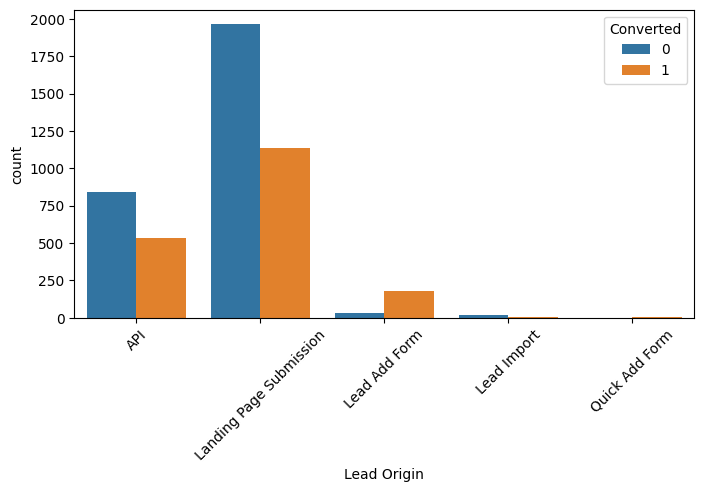

In [ ]:
# Lead Origin
plt.figure(figsize=(8, 4))
s1=sns.countplot(new_train, x='Lead Origin', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

API y Landing Page poseen un mayor numero de registros pero su conversión es baja a comparación de Lead Add Form

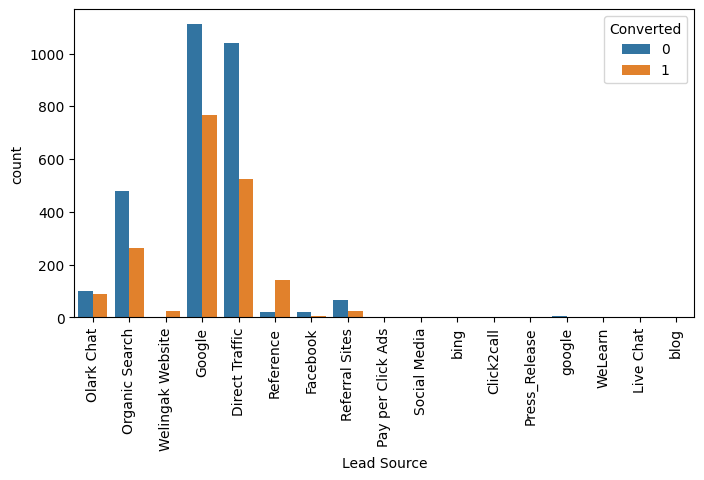

In [ ]:
# Lead Source
plt.figure(figsize=(8, 4))
s1=sns.countplot(new_train, x='Lead Source', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

Social Media y Facebook hacen parte del mismo grupo, Google y google se pueden agrupar y los demas se pueden agrupar como 'Others'

In [ ]:
train_m = new_train.copy()
train_m.head(5)

Lead Origin       Lead Source  Converted  TotalVisits  \
4503                      API        Olark Chat          0          0.0   
6103                      API    Organic Search          0          7.0   
7242                      API        Olark Chat          0          1.0   
5723  Landing Page Submission    Organic Search          1         21.0   
4662            Lead Add Form  Welingak Website          1          1.0   

      Total Time Spent on Website  Page Views Per Visit  \
4503                            0                   0.0   
6103                          303                   3.5   
7242                          192                   1.0   
5723                         1587                   3.5   
4662                          846                   1.0   

                Last Activity         Specialization  \
4503                 SMS Sent                    NaN   
6103             Email Opened                    NaN   
7242  Olark Chat Conversation                    NaN   
5723                 SMS Sent  Media and Advertising   
4662  Page Visited on Website                 Select   

     A free copy of Mastering The Interview    Last Notable Activity  
4503                                     No                 SMS Sent  
6103                                     No             Email Opened  
7242                                     No  Olark Chat Conversation  
5723                                    Yes                 SMS Sent  
4662                                     No                 Modified

In [ ]:
train_m['Lead Source'] = train_m['Lead Source'].replace(np.nan,'Others')
train_m['Lead Source'] = train_m['Lead Source'].replace('google','Google')
train_m['Lead Source'] = train_m['Lead Source'].replace('Facebook','Social Media')
train_m['Lead Source'] = train_m['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                     'testone','NC_EDM', 'Live Chat'] ,'Others')

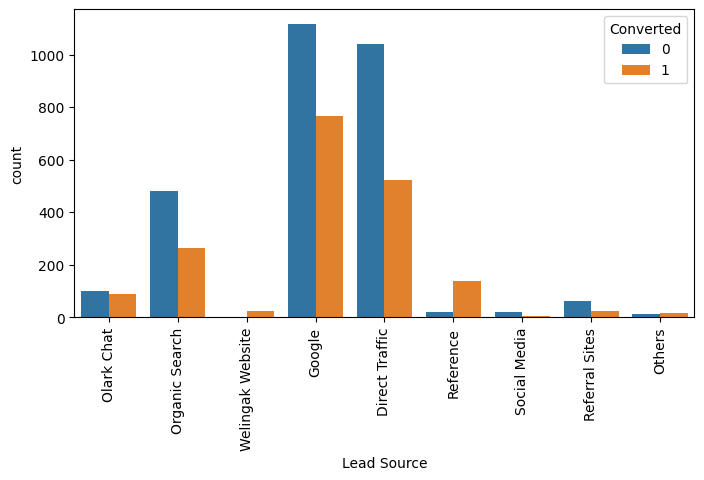

In [ ]:
plt.figure(figsize=(8, 4))
s1=sns.countplot(train_m, x='Lead Source', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

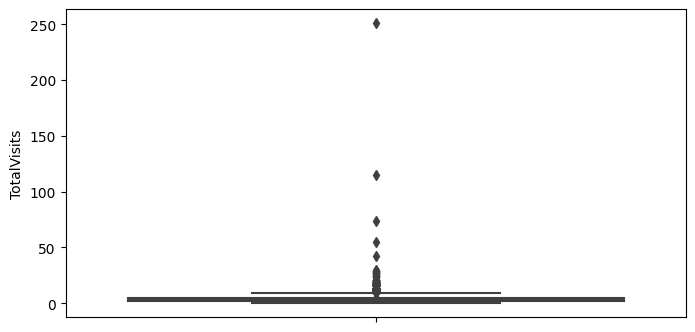

In [ ]:
# Total Visits
plt.figure(figsize=(8,4))
sns.boxplot(y=train_m['TotalVisits'])
plt.show()

Presencia de outilers

Tratamiento? Removemos el 1% por encima y por debajo segun los quantiles.

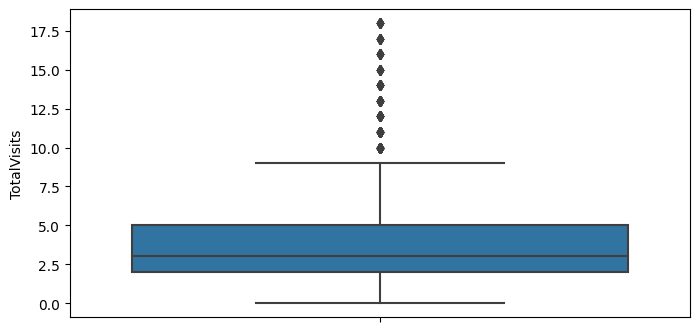

In [ ]:
plt.figure(figsize=(8,4))
Q3 = train_m.TotalVisits.quantile(0.99)
train_m = train_m[(train_m.TotalVisits <= Q3)]
Q1 = train_m.TotalVisits.quantile(0.01)
train_m = train_m[(train_m.TotalVisits >= Q1)]
sns.boxplot(y=train_m['TotalVisits'])
plt.show()

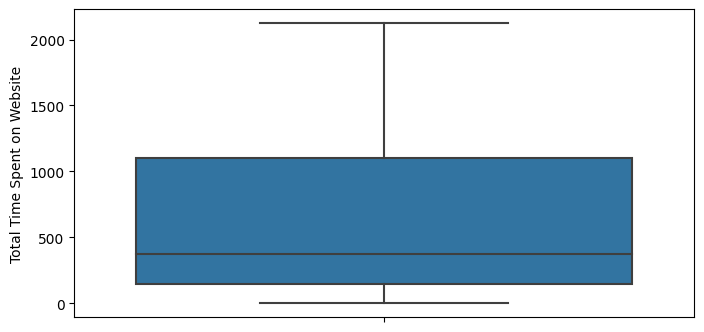

In [ ]:
# Total Time Spent on Websites
plt.figure(figsize=(8,4))
sns.boxplot(y=train_m['Total Time Spent on Website'])
plt.show()

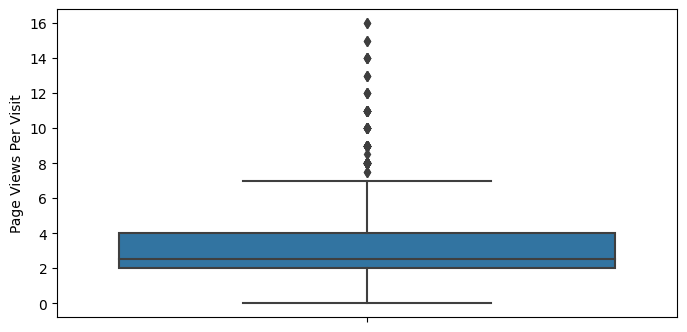

In [ ]:
# Page Views Per Visit
plt.figure(figsize=(8,4))
sns.boxplot(y=train_m['Page Views Per Visit'])
plt.show()

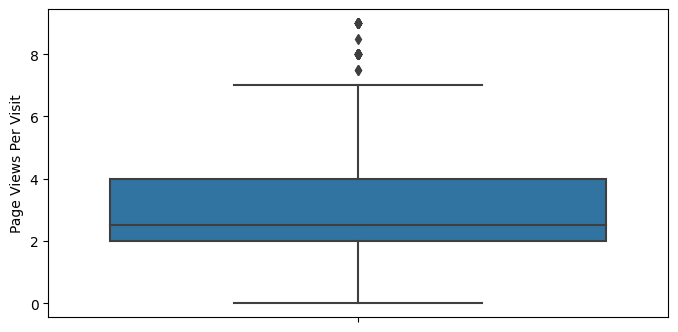

In [ ]:
# Tratamiento de Outliers
plt.figure(figsize=(8,4))
Q3 = train_m['Page Views Per Visit'].quantile(0.99)
train_m = train_m[train_m['Page Views Per Visit'] <= Q3]
Q1 = train_m['Page Views Per Visit'].quantile(0.01)
train_m = train_m[train_m['Page Views Per Visit'] >= Q1]
sns.boxplot(y=train_m['Page Views Per Visit'])
plt.show()

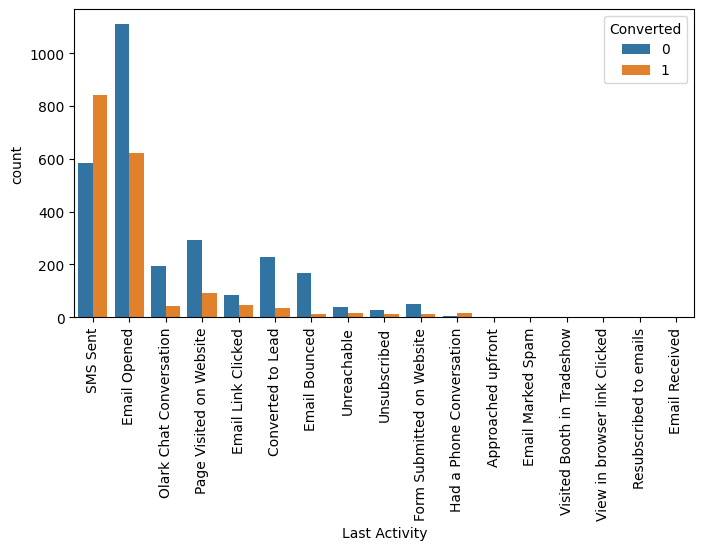

In [ ]:
# Last Activity
plt.figure(figsize=(8, 4))
s1=sns.countplot(train_m, x='Last Activity', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

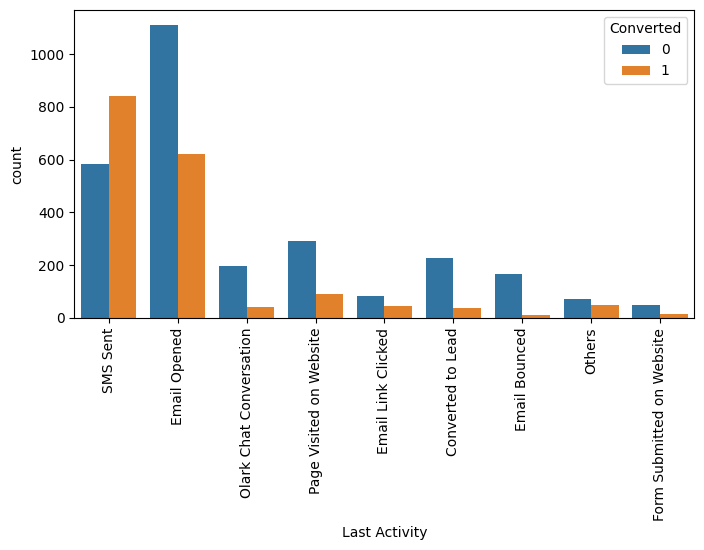

In [ ]:
# Agrupamiento
train_m['Last Activity'] = train_m['Last Activity'].replace(np.nan,'Others')
train_m['Last Activity'] = train_m['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation',
                                                        'Approached upfront',
                                                        'View in browser link Clicked',
                                                        'Email Marked Spam',
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

plt.figure(figsize=(8, 4))
s1=sns.countplot(train_m, x='Last Activity', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

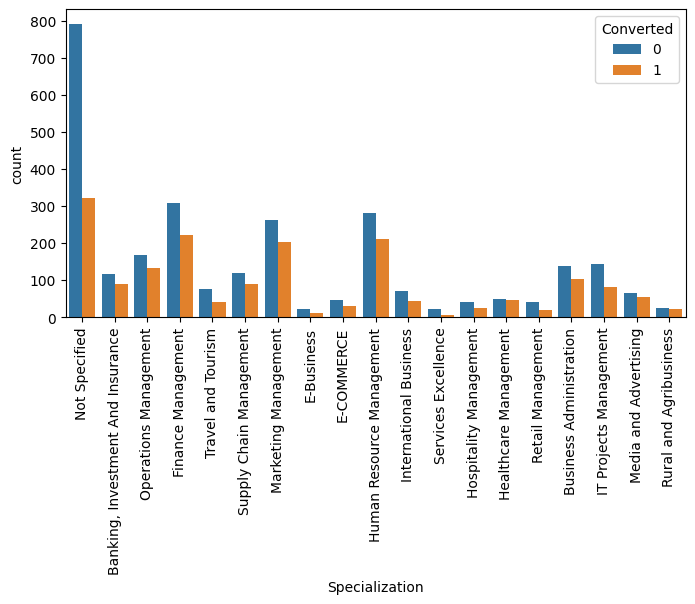

In [ ]:
# Specialization
train_m['Specialization'] = train_m['Specialization'].replace(np.nan, 'Not Specified')
train_m['Specialization'] = train_m['Specialization'].replace('Select', 'Not Specified')

plt.figure(figsize=(8, 4))
s1=sns.countplot(train_m, x='Specialization', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Variable importante para el negocio, a pesar de estar con muchos datos missing, podemos notar la importancia en Management

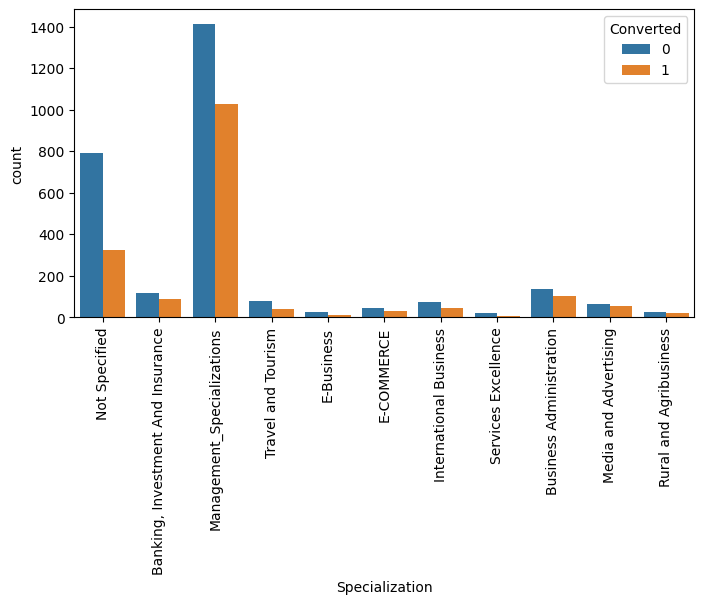

In [ ]:
# Agrupamiento
train_m['Specialization'] = train_m['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

plt.figure(figsize=(8, 4))
s1=sns.countplot(train_m, x='Specialization', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


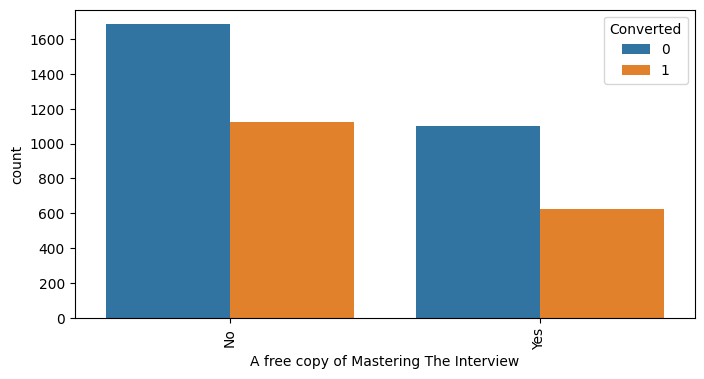

In [ ]:
# A free copy of Mastering The Interview
plt.figure(figsize=(8, 4))
s1=sns.countplot(train_m, x='A free copy of Mastering The Interview', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

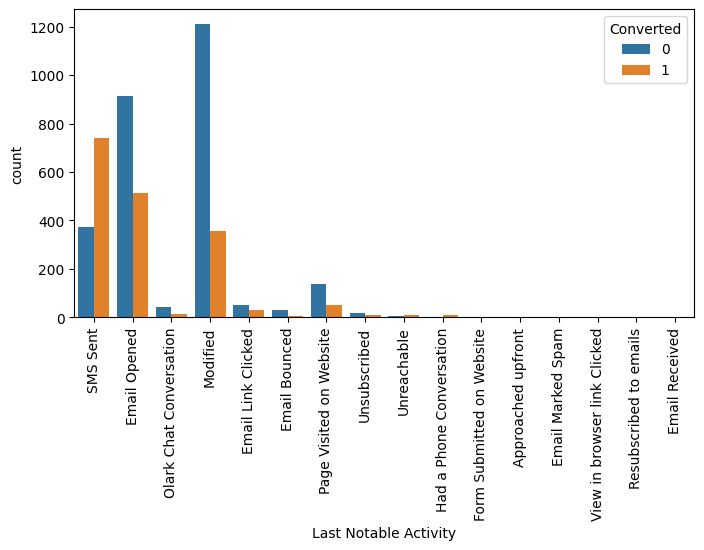

In [ ]:
# Last Notable Activity
plt.figure(figsize=(8, 4))
s1=sns.countplot(train_m, x = 'Last Notable Activity', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

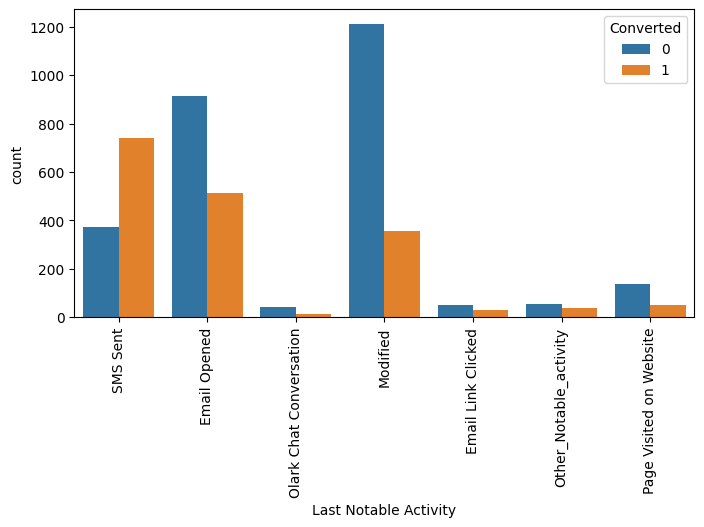

In [ ]:
# Agrupamos ciertas categorias
train_m['Last Notable Activity'] = train_m['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront',
                                                                       'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

plt.figure(figsize=(8, 4))
s1=sns.countplot(train_m, x='Last Notable Activity', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## 2.6 Funciones complementarias.

Definimos una función para apoyo en la generación de pipelines:

In [ ]:
def fix_cat_values(df):
  for column in df.columns:
    #Reemplazos
    if column == 'Lead Source':
      lead_labels = {'google': 'Google', 'Facebook': 'Social Media', 'bing': 'Others','Click2call': 'Others','Press_Release': 'Others','youtubechannel': 'Others',
                     'welearnblog_Home': 'Others','WeLearn': 'Others','blog': 'Others','Pay per Click Ads': 'Others', 'testone': 'Others','NC_EDM': 'Others', 'Live Chat': 'Others'}
      df['Lead Source'] = df['Lead Source'].replace(lead_labels)
      df['Lead Source'] = df['Lead Source'].fillna('Others')
    #Reemplazos
    elif column == 'Last Activity':
      last_labels = {'Unreachable': 'Others','Unsubscribed': 'Others', 'Had a Phone Conversation': 'Others', 'Approached upfront': 'Others', 'View in browser link Clicked': 'Others',
                     'Email Marked Spam': 'Others', 'Email Received': 'Others','Resubscribed to emails': 'Others', 'Visited Booth in Tradeshow': 'Others'}
      df['Last Activity'] = df['Last Activity'].replace(last_labels)
      df['Last Activity'] = df['Last Activity'].fillna('Others')
    #Reemplazos
    elif column == 'Specialization':
      specialization_labels = {'Finance Management': 'Management_Specializations', 'Human Resource Management': 'Management_Specializations', 'Marketing Management': 'Management_Specializations',
                               'Operations Management': 'Management_Specializations', 'IT Projects Management': 'Management_Specializations', 'Supply Chain Management': 'Management_Specializations',
                               'Healthcare Management': 'Management_Specializations', 'Hospitality Management': 'Management_Specializations', 'Retail Management': 'Management_Specializations'}
      df['Specialization'] = df['Specialization'].replace(specialization_labels)
      df['Specialization'] = df['Specialization'].fillna('Not Specified')
      df['Specialization'] = df['Specialization'].replace('Select', 'Not Specified')
    #Reemplazos
    elif column == 'Last Notable Activity':
      lna_labels = {'Had a Phone Conversation': 'Other_Notable_activity', 'Email Marked Spam': 'Other_Notable_activity', 'Unreachable': 'Other_Notable_activity', 'Unsubscribed': 'Other_Notable_activity',
                    'Email Bounced': 'Other_Notable_activity', 'Resubscribed to emails': 'Other_Notable_activity', 'View in browser link Clicked': 'Other_Notable_activity',
                    'Approached upfront': 'Other_Notable_activity', 'Form Submitted on Website': 'Other_Notable_activity', 'Email Received': 'Other_Notable_activity'}
      df['Last Notable Activity'] = df['Last Notable Activity'].replace(lna_labels)

  return df

Basados en la información anterior, vamos a eliminar los outliers eliminando el 1% de datos disperso:

In [ ]:
def fix_num_values(df):
  for column in df.columns:
    if column == 'TotalVisits':
      Q3 = df.TotalVisits.quantile(0.99)
      df = df[(df.TotalVisits <= Q3)]
      Q1 = df.TotalVisits.quantile(0.01)
      df = df[(df.TotalVisits >= Q1)]
    elif column == 'Page Views Per Visit':
      Q3 = df['Page Views Per Visit'].quantile(0.99)
      df = df[df[ 'Page Views Per Visit'] <= Q3]
      Q1 = df[ 'Page Views Per Visit'].quantile(0.01)
      df = df[df[ 'Page Views Per Visit'] >= Q1]
  return df

In [ ]:
print("------------------------TRAIN------------------------")
print(f"El número de registros antes de borrar outliers es: {new_train.shape[0]}")
new_train = fix_num_values(new_train)
print(f"El número de registros después de borrar outliers es: {new_train.shape[0]}")

------------------------TRAIN------------------------
El número de registros antes de borrar outliers es: 4704
El número de registros después de borrar outliers es: 4533


In [ ]:
print("------------------------TEST------------------------")
print(f"El número de registros antes de borrar outliers es: {test.shape[0]}")
test = fix_num_values(test)
print(f"El número de registros después de borrar outliers es: {test.shape[0]}")

------------------------TEST------------------------
El número de registros antes de borrar outliers es: 1525
El número de registros después de borrar outliers es: 1466


In [ ]:
print("------------------------VALIDACION------------------------")
print(f"El número de registros antes de borrar outliers es: {val.shape[0]}")
val = fix_num_values(val)
print(f"El número de registros después de borrar outliers es: {val.shape[0]}")

------------------------VALIDACION------------------------
El número de registros antes de borrar outliers es: 1223
El número de registros después de borrar outliers es: 1180


Probamos la función.

In [ ]:
fix_cat_values(new_train)

Lead Origin       Lead Source  Converted  TotalVisits  \
4503                      API        Olark Chat          0          0.0   
6103                      API    Organic Search          0          7.0   
7242                      API        Olark Chat          0          1.0   
4662            Lead Add Form  Welingak Website          1          1.0   
1591                      API            Google          1          2.0   
...                       ...               ...        ...          ...   
1608  Landing Page Submission    Organic Search          0          3.0   
6996  Landing Page Submission    Organic Search          1          5.0   
72    Landing Page Submission    Referral Sites          0          3.0   
4111  Landing Page Submission    Direct Traffic          0          3.0   
8648  Landing Page Submission    Direct Traffic          1          2.0   

      Total Time Spent on Website  Page Views Per Visit  \
4503                            0                   0.0   
6103                          303                   3.5   
7242                          192                   1.0   
4662                          846                   1.0   
1591                         1069                   2.0   
...                           ...                   ...   
1608                          560                   3.0   
6996                         1184                   5.0   
72                            111                   3.0   
4111                         1685                   1.5   
8648                         1019                   2.0   

                Last Activity                     Specialization  \
4503                 SMS Sent                      Not Specified   
6103             Email Opened                      Not Specified   
7242  Olark Chat Conversation                      Not Specified   
4662  Page Visited on Website                      Not Specified   
1591             Email Opened  Banking, Investment And Insurance   
...                       ...                                ...   
1608                 SMS Sent                 Travel and Tourism   
6996                 SMS Sent              Media and Advertising   
72              Email Bounced             International Business   
4111  Page Visited on Website                      Not Specified   
8648                 SMS Sent         Management_Specializations   

     A free copy of Mastering The Interview    Last Notable Activity  
4503                                     No                 SMS Sent  
6103                                     No             Email Opened  
7242                                     No  Olark Chat Conversation  
4662                                     No                 Modified  
1591                                     No             Email Opened  
...                                     ...                      ...  
1608                                    Yes                 Modified  
6996                                    Yes                 SMS Sent  
72                                      Yes                 Modified  
4111                                     No                 Modified  
8648                                    Yes                 SMS Sent  

[4533 rows x 10 columns]

---
# 3. Modelamiento.

In [ ]:
target_feature = 'Converted'
X_train, Y_train = new_train.drop([target_feature], axis=1), new_train[target_feature]
display(X_train)
display(Y_train)

Lead Origin       Lead Source  TotalVisits  \
4503                      API        Olark Chat          0.0   
6103                      API    Organic Search          7.0   
7242                      API        Olark Chat          1.0   
4662            Lead Add Form  Welingak Website          1.0   
1591                      API            Google          2.0   
...                       ...               ...          ...   
1608  Landing Page Submission    Organic Search          3.0   
6996  Landing Page Submission    Organic Search          5.0   
72    Landing Page Submission    Referral Sites          3.0   
4111  Landing Page Submission    Direct Traffic          3.0   
8648  Landing Page Submission    Direct Traffic          2.0   

      Total Time Spent on Website  Page Views Per Visit  \
4503                            0                   0.0   
6103                          303                   3.5   
7242                          192                   1.0   
4662                          846                   1.0   
1591                         1069                   2.0   
...                           ...                   ...   
1608                          560                   3.0   
6996                         1184                   5.0   
72                            111                   3.0   
4111                         1685                   1.5   
8648                         1019                   2.0   

                Last Activity                     Specialization  \
4503                 SMS Sent                      Not Specified   
6103             Email Opened                      Not Specified   
7242  Olark Chat Conversation                      Not Specified   
4662  Page Visited on Website                      Not Specified   
1591             Email Opened  Banking, Investment And Insurance   
...                       ...                                ...   
1608                 SMS Sent                 Travel and Tourism   
6996                 SMS Sent              Media and Advertising   
72              Email Bounced             International Business   
4111  Page Visited on Website                      Not Specified   
8648                 SMS Sent         Management_Specializations   

     A free copy of Mastering The Interview    Last Notable Activity  
4503                                     No                 SMS Sent  
6103                                     No             Email Opened  
7242                                     No  Olark Chat Conversation  
4662                                     No                 Modified  
1591                                     No             Email Opened  
...                                     ...                      ...  
1608                                    Yes                 Modified  
6996                                    Yes                 SMS Sent  
72                                      Yes                 Modified  
4111                                     No                 Modified  
8648                                    Yes                 SMS Sent  

[4533 rows x 9 columns]

4503    0
6103    0
7242    0
4662    1
1591    1
       ..
1608    0
6996    1
72      0
4111    0
8648    1
Name: Converted, Length: 4533, dtype: int64

Preparamos los datos de validación:

In [ ]:
X_val, Y_val = val.drop([target_feature], axis=1), val[target_feature]
display(X_val)
display(Y_val)

Lead Origin     Lead Source  TotalVisits  \
5370  Landing Page Submission  Direct Traffic          2.0   
791                       API          Google          8.0   
7049                      API      Olark Chat          0.0   
6094  Landing Page Submission          Google          3.0   
520   Landing Page Submission  Organic Search          4.0   
...                       ...             ...          ...   
2496  Landing Page Submission  Direct Traffic          1.0   
921                       API  Referral Sites          2.0   
6629                      API      Olark Chat          0.0   
3025  Landing Page Submission          Google          3.0   
1384  Landing Page Submission          Google          5.0   

      Total Time Spent on Website  Page Views Per Visit       Last Activity  \
5370                          171                  2.00            SMS Sent   
791                           501                  2.67        Email Opened   
7049                            0                  0.00        Email Opened   
6094                         1742                  3.00            SMS Sent   
520                            92                  2.00  Email Link Clicked   
...                           ...                   ...                 ...   
2496                          296                  1.00   Converted to Lead   
921                           494                  2.00        Email Opened   
6629                            0                  0.00            SMS Sent   
3025                           49                  3.00        Email Opened   
1384                          286                  5.00        Email Opened   

                 Specialization A free copy of Mastering The Interview  \
5370      Media and Advertising                                    Yes   
791                      Select                                     No   
7049                     Select                                     No   
6094          Retail Management                                     No   
520          Finance Management                                    Yes   
...                         ...                                    ...   
2496                 E-COMMERCE                                    Yes   
921                      Select                                     No   
6629      Operations Management                                     No   
3025     Rural and Agribusiness                                     No   
1384  Human Resource Management                                     No   

     Last Notable Activity  
5370              SMS Sent  
791           Email Opened  
7049              Modified  
6094              SMS Sent  
520     Email Link Clicked  
...                    ...  
2496              Modified  
921           Email Opened  
6629              SMS Sent  
3025          Email Opened  
1384          Email Opened  

[1180 rows x 9 columns]

5370    0
791     0
7049    0
6094    1
520     0
       ..
2496    0
921     0
6629    1
3025    0
1384    0
Name: Converted, Length: 1180, dtype: int64

Preparamos los datos test:

In [ ]:
X_test, Y_test = test.drop([target_feature], axis=1), test[target_feature]
display(X_test)
display(Y_test)

Lead Origin     Lead Source  TotalVisits  \
5554                      API  Organic Search          2.0   
3827  Landing Page Submission  Direct Traffic          2.0   
8427                      API  Direct Traffic          5.0   
2681            Lead Add Form       Reference          0.0   
2763            Lead Add Form       Reference          0.0   
...                       ...             ...          ...   
6079  Landing Page Submission  Organic Search          3.0   
6542  Landing Page Submission          Google          5.0   
5420  Landing Page Submission  Direct Traffic          2.0   
420                       API          Google          2.0   
5034  Landing Page Submission          Google          4.0   

      Total Time Spent on Website  Page Views Per Visit  \
5554                           72                   2.0   
3827                         1271                   2.0   
8427                          547                   2.5   
2681                            0                   0.0   
2763                            0                   0.0   
...                           ...                   ...   
6079                          206                   3.0   
6542                          160                   5.0   
5420                          453                   2.0   
420                           339                   2.0   
5034                         1589                   4.0   

                Last Activity          Specialization  \
5554             Email Opened                  Select   
3827                 SMS Sent   Operations Management   
8427  Olark Chat Conversation                  Select   
2681                 SMS Sent      Finance Management   
2763                 SMS Sent    Marketing Management   
...                       ...                     ...   
6079        Converted to Lead  IT Projects Management   
6542                 SMS Sent  International Business   
5420            Email Bounced      Travel and Tourism   
420               Unreachable   Media and Advertising   
5034             Email Opened      Finance Management   

     A free copy of Mastering The Interview Last Notable Activity  
5554                                     No          Email Opened  
3827                                     No              SMS Sent  
8427                                     No              Modified  
2681                                     No              SMS Sent  
2763                                     No              SMS Sent  
...                                     ...                   ...  
6079                                    Yes              Modified  
6542                                    Yes              SMS Sent  
5420                                     No              Modified  
420                                      No              Modified  
5034                                     No              Modified  

[1466 rows x 9 columns]

5554    0
3827    1
8427    0
2681    1
2763    1
       ..
6079    0
6542    0
5420    0
420     0
5034    0
Name: Converted, Length: 1466, dtype: int64

### 3.1 Modelo base de regresión logística

### 3.1.1. Implementación.

Construimos el pipeline para tratamiento de la información:

In [ ]:
#Definimos el transformador numérico, el cuál incluye la imputación de valores ausentes mediante el dato más frecuente:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ("scaler_std", StandardScaler())
    ]
)

# Definimos el transformador categórico, el cuál incluye el uso de FunctionTransformer para ajustar los datos de acuerdo con el diccionario de datos y generar el OneHotEncoder para que el algoritmo pueda entender la información como datos numéricos:
cat_transformer = Pipeline(
    steps=[
        ('imputer', FunctionTransformer(fix_cat_values, validate=False)),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

pipe = Pipeline(steps=[
    ('column_transformer', preprocessor)
])


pipe.fit_transform(X_train)

<4533x45 sparse matrix of type '<class 'numpy.float64'>'
	with 40797 stored elements in Compressed Sparse Row format>

In [ ]:
%%time
estimators_bm = [
        ('transform', preprocessor),
        ('regression', LogisticRegression())
]

pipe_bm = Pipeline(estimators_bm)

pipe_bm.fit(X_train, Y_train)

CPU times: user 62.4 ms, sys: 0 ns, total: 62.4 ms
Wall time: 62.4 ms


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler_std',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2db45c33d0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7a2db455ca60>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2db4517100>)])),
                ('regression', LogisticRegression())])

Verificamos la construcción del pipeline:

In [ ]:
cat_column_names = pipe['column_transformer'].transformers_[1][1][1].get_feature_names_out()
cat_column_names

array(['Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Manage

Las columnas numéricas:

In [ ]:
num_column_names = pipe['column_transformer'].transformers_[0][1].feature_names_in_
num_column_names

array(['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

Todas las columnas del pipeline:

In [ ]:
col_names = list(num_column_names) + list(cat_column_names)
col_names

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_API',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Others',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_Welingak Website',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Others',
 'Last Activity_Page Visited on Website',
 'Last Activity_SMS Sent',
 'Specialization_Banking, Investment And Insurance',
 'Specialization_Business Administration',
 'Specialization_E-Business',
 'Specialization_E-COMMERCE',
 'Specialization_International Business',
 'Specialization_Management_Specializatio

Veamos de una forma más agradable la información:

In [ ]:
X_train_2_m = pd.DataFrame(pipe.fit_transform(X_train).toarray(), columns=col_names)
X_train_2_m

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0       -1.426251                    -1.111103             -1.712333   
1        1.055863                    -0.560069              0.381548   
2       -1.071664                    -0.761933             -1.114081   
3       -1.071664                     0.427428             -1.114081   
4       -0.717076                     0.832975             -0.515829   
...           ...                          ...                   ...   
4528    -0.362488                    -0.092690              0.082422   
4529     0.346687                     1.042113              1.278926   
4530    -0.362488                    -0.909239              0.082422   
4531    -0.362488                     1.953229             -0.814955   
4532    -0.717076                     0.742045             -0.515829   

      Lead Origin_API  Lead Origin_Landing Page Submission  \
0                 1.0                                  0.0   
1                 1.0                                  0.0   
2                 1.0                                  0.0   
3                 0.0                                  0.0   
4                 1.0                                  0.0   
...               ...                                  ...   
4528              0.0                                  1.0   
4529              0.0                                  1.0   
4530              0.0                                  1.0   
4531              0.0                                  1.0   
4532              0.0                                  1.0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                           0.0                      0.0   
1                           0.0                      0.0   
2                           0.0                      0.0   
3                           1.0                      0.0   
4                           0.0                      0.0   
...                         ...                      ...   
4528                        0.0                      0.0   
4529                        0.0                      0.0   
4530                        0.0                      0.0   
4531                        0.0                      0.0   
4532                        0.0                      0.0   

      Lead Source_Direct Traffic  Lead Source_Google  Lead Source_Olark Chat  \
0                            0.0                 0.0                     1.0   
1                            0.0                 0.0                     0.0   
2                            0.0                 0.0                     1.0   
3                            0.0                 0.0                     0.0   
4                            0.0                 1.0                     0.0   
...                          ...                 ...                     ...   
4528                         0.0                 0.0                     0.0   
4529                         0.0                 0.0                     0.0   
4530                         0.0                 0.0                     0.0   
4531                         1.0                 0.0                     0.0   
4532                         1.0                 0.0                     0.0   

      ...  Specialization_Travel and Tourism  \
0     ...                                0.0   
1     ...                                0.0   
2     ...                                0.0   
3     ...                                0.0   
4     ...                                0.0   
...   ...                                ...   
4528  ...                                1.0   
4529  ...                                0.0   
4530  ...                                0.0   
4531  ...                                0.0   
4532  ...                                0.0   

      A free copy of Mastering The Interview_No  \
0                                           1.0   
1                                  

In [ ]:
y_pred_train = pipe_bm.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(8,8)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

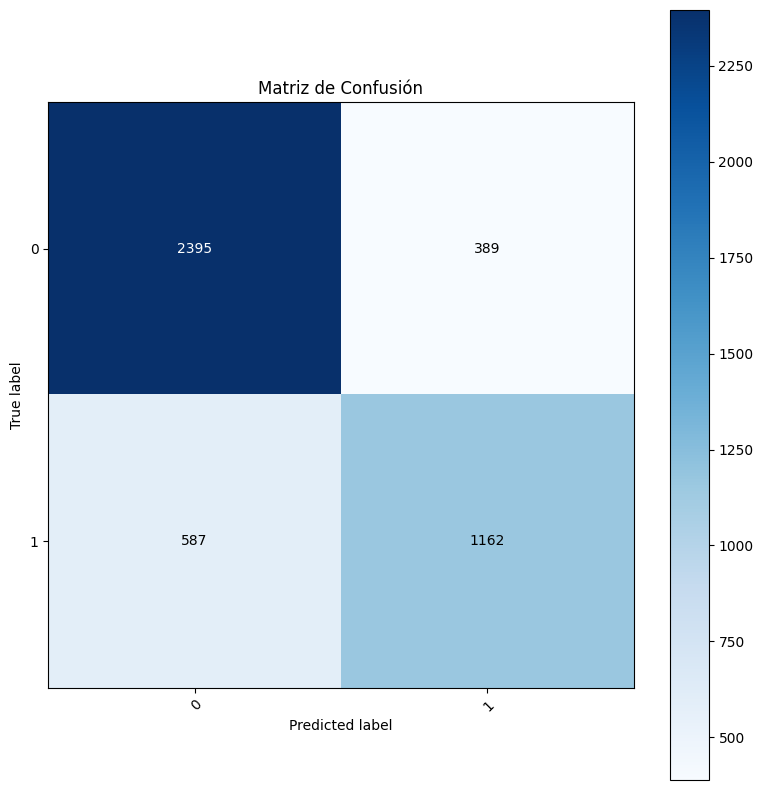

In [ ]:
%matplotlib inline
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_train, classes=[0,1], title='Matriz de Confusión')

Normalized confusion matrix


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

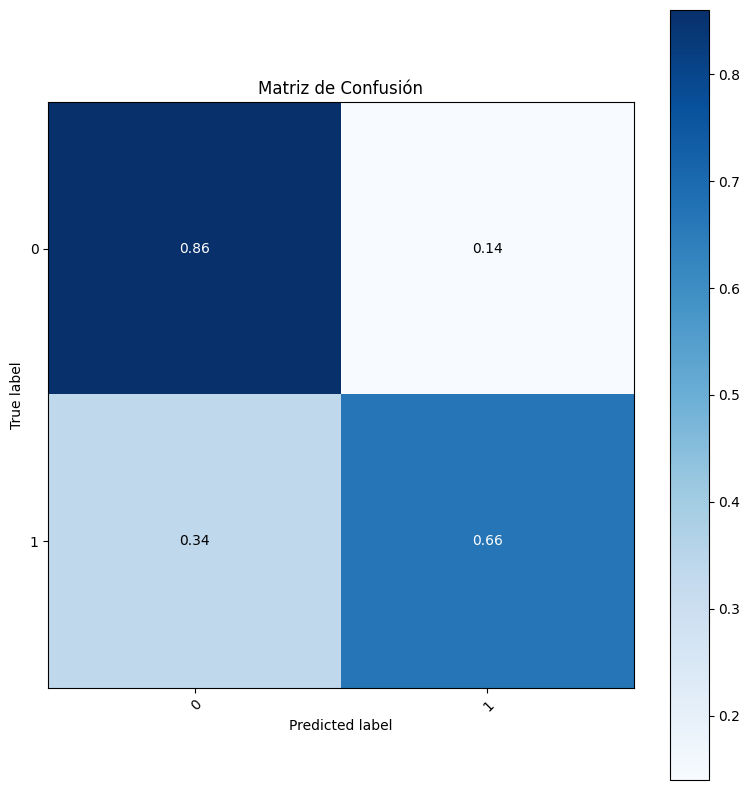

In [ ]:
%matplotlib inline
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_train, classes=[0,1], normalize=True, title='Matriz de Confusión')

Verificamos los rendimientos en entrenamiento:

In [ ]:
train_report = classification_report(Y_train, y_pred_train)
print("Train Report for Logistic Regression\n", train_report)

Train Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      2784
           1       0.75      0.66      0.70      1749

    accuracy                           0.78      4533
   macro avg       0.78      0.76      0.77      4533
weighted avg       0.78      0.78      0.78      4533



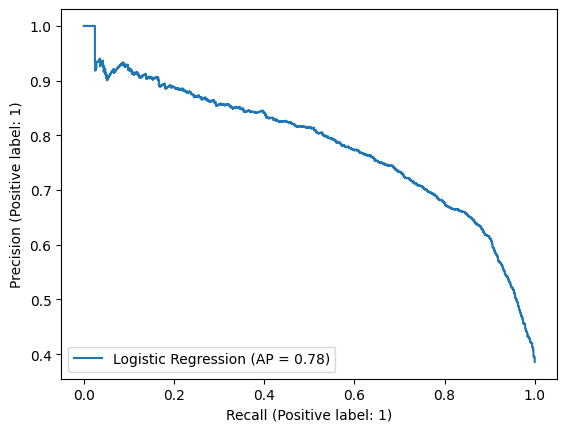

In [ ]:
%matplotlib inline
PrecisionRecallDisplay.from_estimator(pipe_bm, X_train, Y_train, name="Logistic Regression")
plt.show()

In [ ]:
def display_multiple_models_roc_curve(models, X, y):
    # Below for loop iterates through your models list
    for m in models:
        model = m['model'] # select the model
        y_pred=model.predict(X) # predict the test data
    # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
    # Calculate Area under the curve to display on the plot
        auc = roc_auc_score(y,y_pred)
    # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    # Custom settings for the plot
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   # Display

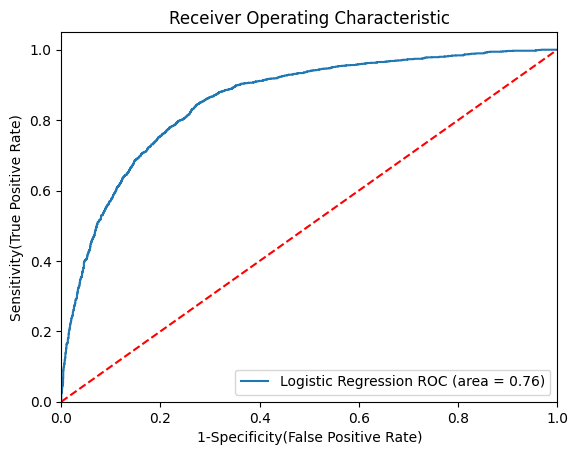

In [ ]:
models = [
    {
        'label': 'Logistic Regression',
        'model': pipe_bm,
    }
]

display_multiple_models_roc_curve(models, X_train, Y_train)

Verifiquemos los rendimientos con validación:

In [ ]:
y_pred_val = pipe_bm.predict(X_val)
y_pred_val

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
val_report = classification_report(Y_val, y_pred_val)

### 3.1.2. Rendimientos.

Veamos de forma comparativa los rendimientos:

In [ ]:
print("Train Report for Logistic Regression\n", train_report)

Train Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      2784
           1       0.75      0.66      0.70      1749

    accuracy                           0.78      4533
   macro avg       0.78      0.76      0.77      4533
weighted avg       0.78      0.78      0.78      4533



In [ ]:
print("Validation Report for Logistic Regression\n", val_report)

Validation Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       737
           1       0.74      0.64      0.69       443

    accuracy                           0.78      1180
   macro avg       0.77      0.75      0.76      1180
weighted avg       0.78      0.78      0.78      1180



¿Qué opinas sobre los rendimientos?, ¿está sobre ajustado?

### 3.2 Busqueda de Hiperparámetros

Para la búsqueda de hiperparámetros usamos todo el conjunto de datos train:

In [ ]:
new_train = train.drop(drop_columns, axis=1)
new_train = new_train.drop_duplicates()
#No olvidemos que debemos eliminar los outliers
new_train = fix_num_values(new_train)
new_train

Lead Origin     Lead Source  Converted  TotalVisits  \
2118            Lead Add Form       Reference          1          0.0   
4504  Landing Page Submission          Google          1          5.0   
1700  Landing Page Submission          Google          1          4.0   
7053                      API          Google          1          4.0   
141                       API  Referral Sites          0          6.0   
...                       ...             ...        ...          ...   
266                       API  Direct Traffic          0         11.0   
3973  Landing Page Submission  Organic Search          0          6.0   
834   Landing Page Submission          Google          0          3.0   
6452  Landing Page Submission          Google          1          5.0   
757                       API  Organic Search          0          7.0   

      Total Time Spent on Website  Page Views Per Visit  \
2118                            0                   0.0   
4504                         1063                   2.5   
1700                         1590                   4.0   
7053                         1483                   2.0   
141                           216                   2.0   
...                           ...                   ...   
266                            10                   5.5   
3973                          589                   2.0   
834                          1198                   3.0   
6452                          639                   5.0   
757                             9                   7.0   

                 Last Activity           Specialization  \
2118                  SMS Sent     Marketing Management   
4504              Email Opened       Finance Management   
1700              Email Opened     Marketing Management   
7053  Had a Phone Conversation  Supply Chain Management   
141    Page Visited on Website                      NaN   
...                        ...                      ...   
266    Page Visited on Website                   Select   
3973              Email Opened    Media and Advertising   
834                   SMS Sent     Marketing Management   
6452                  SMS Sent     Marketing Management   
757               Email Opened                      NaN   

     A free copy of Mastering The Interview     Last Notable Activity  
2118                                     No                  Modified  
4504                                     No              Email Opened  
1700                                     No              Email Opened  
7053                                     No  Had a Phone Conversation  
141                                      No   Page Visited on Website  
...                                     ...                       ...  
266                                      No   Page Visited on Website  
3973                                    Yes              Email Opened  
834                                      No                  Modified  
6452                                     No                  SMS Sent  
757                                      No              Email Opened  

[5631 rows x 10 columns]

In [ ]:
X_train, Y_train = new_train.drop([target_feature], axis=1), new_train[target_feature]
display(X_train)
display(Y_train)

Lead Origin     Lead Source  TotalVisits  \
2118            Lead Add Form       Reference          0.0   
4504  Landing Page Submission          Google          5.0   
1700  Landing Page Submission          Google          4.0   
7053                      API          Google          4.0   
141                       API  Referral Sites          6.0   
...                       ...             ...          ...   
266                       API  Direct Traffic         11.0   
3973  Landing Page Submission  Organic Search          6.0   
834   Landing Page Submission          Google          3.0   
6452  Landing Page Submission          Google          5.0   
757                       API  Organic Search          7.0   

      Total Time Spent on Website  Page Views Per Visit  \
2118                            0                   0.0   
4504                         1063                   2.5   
1700                         1590                   4.0   
7053                         1483                   2.0   
141                           216                   2.0   
...                           ...                   ...   
266                            10                   5.5   
3973                          589                   2.0   
834                          1198                   3.0   
6452                          639                   5.0   
757                             9                   7.0   

                 Last Activity           Specialization  \
2118                  SMS Sent     Marketing Management   
4504              Email Opened       Finance Management   
1700              Email Opened     Marketing Management   
7053  Had a Phone Conversation  Supply Chain Management   
141    Page Visited on Website                      NaN   
...                        ...                      ...   
266    Page Visited on Website                   Select   
3973              Email Opened    Media and Advertising   
834                   SMS Sent     Marketing Management   
6452                  SMS Sent     Marketing Management   
757               Email Opened                      NaN   

     A free copy of Mastering The Interview     Last Notable Activity  
2118                                     No                  Modified  
4504                                     No              Email Opened  
1700                                     No              Email Opened  
7053                                     No  Had a Phone Conversation  
141                                      No   Page Visited on Website  
...                                     ...                       ...  
266                                      No   Page Visited on Website  
3973                                    Yes              Email Opened  
834                                      No                  Modified  
6452                                     No                  SMS Sent  
757                                      No              Email Opened  

[5631 rows x 9 columns]

2118    1
4504    1
1700    1
7053    1
141     0
       ..
266     0
3973    0
834     0
6452    1
757     0
Name: Converted, Length: 5631, dtype: int64

In [ ]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', FunctionTransformer(fix_cat_values, validate=False))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

estimators = [
    ('transform', preprocessor),
    ('regression', LogisticRegression())
]

pipe_new = Pipeline(estimators)

parameters = {
    'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    'transform__cat': [OneHotEncoder(handle_unknown='ignore'), 'passthrough'],
    'regression__C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipe_new, parameters, verbose=2, scoring='precision', cv=5)

In [ ]:
%%time
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total tim

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=0.1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=0.1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END reg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=1, transform__cat=p

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=MinMaxSc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=10, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=passthrough; total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=passthrough; total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=passthrough; total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=passthrough; total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=passthrough; total time=   0.0s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.1s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END reg

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a2db428d750>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          FunctionTransformer(func=<function fix_cat_values at 0x7a2db455ca60>))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a2db428dae0>)])),
                                       ('regression', LogisticRegression())]),
             param_grid={'regression__C': [0.01, 0.1, 1, 10, 100],
                         'transform__cat': [OneHotEncoder(handle_unknown='ignore'),
                                            'passthrough'],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='precision', verbose=2)

In [ ]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.024226      0.003796         0.007604        0.000824   
1        0.020897      0.001782         0.006762        0.000558   
2        0.055894      0.004751         0.008680        0.001389   
3        0.005963      0.001390         0.000000        0.000000   
4        0.005392      0.000086         0.000000        0.000000   
5        0.003814      0.000235         0.000000        0.000000   
6        0.036965      0.003621         0.007980        0.000711   
7        0.031264      0.002192         0.008406        0.000740   
8        0.075232      0.010834         0.011242        0.001283   
9        0.009308      0.001990         0.000000        0.000000   
10       0.008754      0.002988         0.000000        0.000000   
11       0.004569      0.000212         0.000000        0.000000   
12       0.075993      0.004162         0.011703        0.000587   
13       0.066964      0.017170         0.010941        0.002132   
14       0.058657      0.003986         0.009829        0.001924   
15       0.005702      0.000393         0.000000        0.000000   
16       0.005838      0.000172         0.000000        0.000000   
17       0.004044      0.000122         0.000000        0.000000   
18       0.052083      0.003144         0.008943        0.001274   
19       0.054094      0.004723         0.008432        0.000903   
20       0.054669      0.001683         0.009249        0.002166   
21       0.006259      0.000430         0.000000        0.000000   
22       0.007071      0.001204         0.000000        0.000000   
23       0.003638      0.000178         0.000000        0.000000   
24       0.050408      0.001459         0.009500        0.001998   
25       0.054355      0.002734         0.008889        0.001999   
26       0.055383      0.003307         0.008811        0.001108   
27       0.005654      0.000354         0.000000        0.000000   
28       0.005480      0.000823         0.000000        0.000000   
29       0.003908      0.000138         0.000000        0.000000   

   param_regression__C                    param_transform__cat  \
0                 0.01  OneHotEncoder(handle_unknown='ignore')   
1                 0.01  OneHotEncoder(handle_unknown='ignore')   
2                 0.01  OneHotEncoder(handle_unknown='ignore')   
3                 0.01                             passthrough   
4                 0.01                             passthrough   
5                 0.01                             passthrough   
6                  0.1  OneHotEncoder(handle_unknown='ignore')   
7                  0.1  OneHotEncoder(handle_unknown='ignore')   
8                  0.1  OneHotEncoder(handle_unknown='ignore')   
9                  0.1                             passthrough   
10                 0.1                             passthrough   
11                 0.1                             passthrough   
12                   1  OneHotEncoder(handle_unknown='ignore')   
13                   1  OneHotEncoder(handle_unknown='ignore')   
14                   1  OneHotEncoder(handle_unknown='ignore')   
15                   1                             passthrough   
16                   1                             passthrough   
17                   1                             passthrough   
18                  10  OneHotEncoder(handle_unknown='ignore')   
19                  10  OneHotEncoder(handle_unknown='ignore')   
20                  10  OneHotEncoder(handle_unknown='ignore')   
21                  10                             passthrough   
22                  10                             passthrough   
23                  10                             passthrough   
24                 100  OneHotEncoder(handle_unknown='ignore')   
25                 100  OneHotEncoder(handle_unknown='ignore')   
26                 100  OneHotEncoder(handle_unknown='ignore')   
27                 100                         

In [ ]:
grid_search.best_params_

{'regression__C': 0.1,
 'transform__cat': OneHotEncoder(handle_unknown='ignore'),
 'transform__num': StandardScaler()}

In [ ]:
best_model.predict_proba(X_train)

array([[0.21501714, 0.78498286],
       [0.38882596, 0.61117404],
       [0.23917022, 0.76082978],
       ...,
       [0.42117568, 0.57882432],
       [0.36904961, 0.63095039],
       [0.9533559 , 0.0466441 ]])

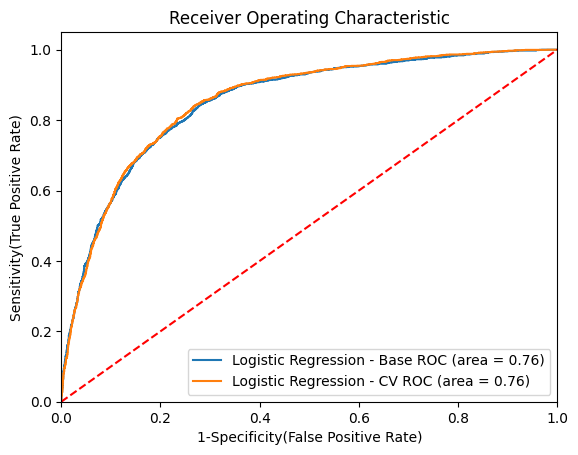

In [ ]:
models = [
    {
        'label': 'Logistic Regression - Base',
        'model': pipe_bm,
    },
    {
        'label': 'Logistic Regression - CV',
        'model': best_model,
    }
]

display_multiple_models_roc_curve(models, X_train, Y_train)

In [ ]:
print("Test Report for Logistic Regression\n", classification_report(Y_train, best_model.predict(X_train)))

Test Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      3494
           1       0.76      0.65      0.70      2137

    accuracy                           0.79      5631
   macro avg       0.78      0.76      0.77      5631
weighted avg       0.79      0.79      0.79      5631



Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

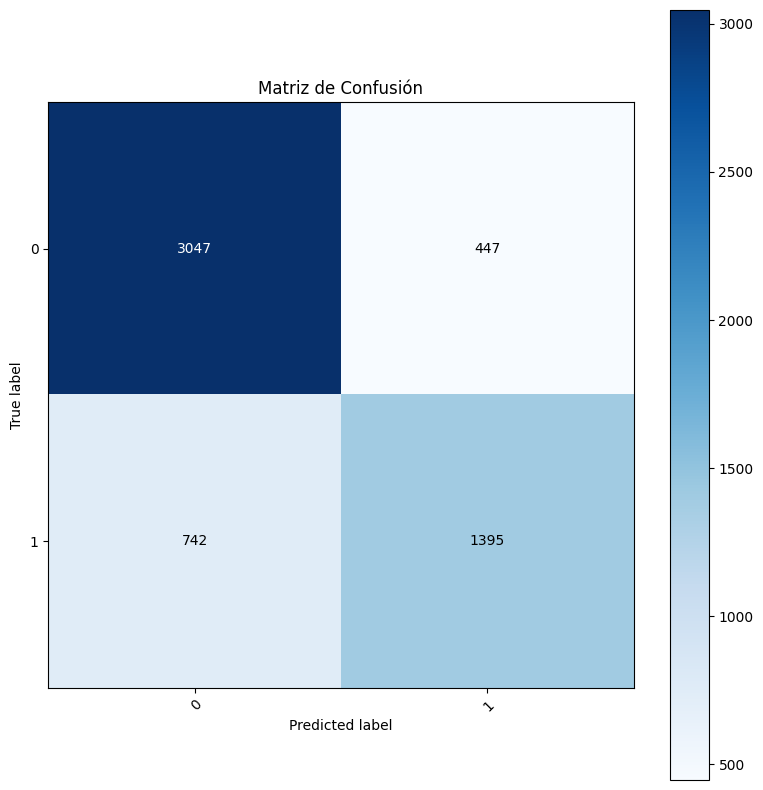

In [ ]:
plot_confusion_matrix(y_true=Y_train, y_pred= best_model.predict(X_train), classes=[0,1],
                      title='Matriz de Confusión')

### 3.3 Evaluación del Modelo


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 5554 to 5034
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             1466 non-null   object 
 1   Lead Source                             1465 non-null   object 
 2   Converted                               1466 non-null   int64  
 3   TotalVisits                             1466 non-null   float64
 4   Total Time Spent on Website             1466 non-null   int64  
 5   Page Views Per Visit                    1466 non-null   float64
 6   Last Activity                           1466 non-null   object 
 7   Specialization                          1343 non-null   object 
 8   A free copy of Mastering The Interview  1466 non-null   object 
 9   Last Notable Activity                   1466 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 126.0+ K

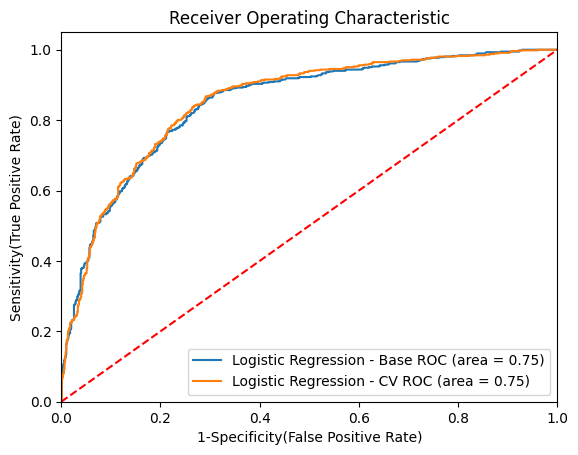

In [ ]:
X_test, y_test = test.drop(['Converted'], axis=1), test['Converted']
display_multiple_models_roc_curve(models, X_test, y_test)

In [ ]:
model_test = best_model.predict(X_test)
model_test

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
print("Test Report for Logistic Regression\n", classification_report(y_test, best_model.predict(X_test)))

Test Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       899
           1       0.75      0.63      0.69       567

    accuracy                           0.78      1466
   macro avg       0.77      0.75      0.76      1466
weighted avg       0.77      0.78      0.77      1466



# 4. Preguntas

- ¿Qué otros hiperparámetros deberíamos buscar para esta situación?
- ¿Que otros tipos de algoritmos de clasificación nos podrían servir para resolver este problema?